In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import datetime
import itertools
import warnings


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm # type: ignore; statistical modeling

**Importing the Dataset**

In [3]:
df = pd.read_csv("train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df.dropna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [8]:
# Transform dates to Pandas Datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')

#Adding a feature "Month"

df['Month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')


df.head()
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Month                 period[M]
dtype: object

In [9]:
# Some Statistics about the dataset
df.describe()

,Row ID,Order Date,Postal Code,Sales
count,9800.000000,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,32041.223413,626.651875


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

**Number of States, Products categories, Ship Mode**

In [11]:
# Let see how many unique values we have in Product_ID, shipping mode, Categories and sub-categories
#print('* There are stores in {} states'.format(len(df['State'].unique())))

print("*There are stores in {} regions in {} states and {} different cities".format(len(df['Region'].unique()), len(df['State'].unique()), len(df['City'].unique())))
print("*There are {} different products".format(len(df['Product ID'].unique())))
print("*There are {} different categories".format(len(df['Category'].unique())))
print("*There are {} different Sub-Categories".format(len(df['Sub-Category'].unique())))
print("*There are {} shipping mode".format(len(df['Ship Mode'].unique())))


*There are stores in 4 regions in 49 states and 529 different cities
*There are 1861 different products
*There are 3 different categories
*There are 17 different Sub-Categories
*There are 4 shipping mode


In [12]:
#Setting the Order Date as the index for our dataset
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2017-11-08', '2017-11-08', '2017-06-12', '2016-10-11',
               '2016-10-11', '2015-06-09', '2015-06-09', '2015-06-09',
               '2015-06-09', '2015-06-09',
               ...
               '2018-03-27', '2015-05-21', '2015-05-21', '2015-05-21',
               '2015-05-21', '2017-05-21', '2016-01-12', '2016-01-12',
               '2016-01-12', '2016-01-12'],
              dtype='datetime64[ns]', name='Order Date', length=9800, freq=None)

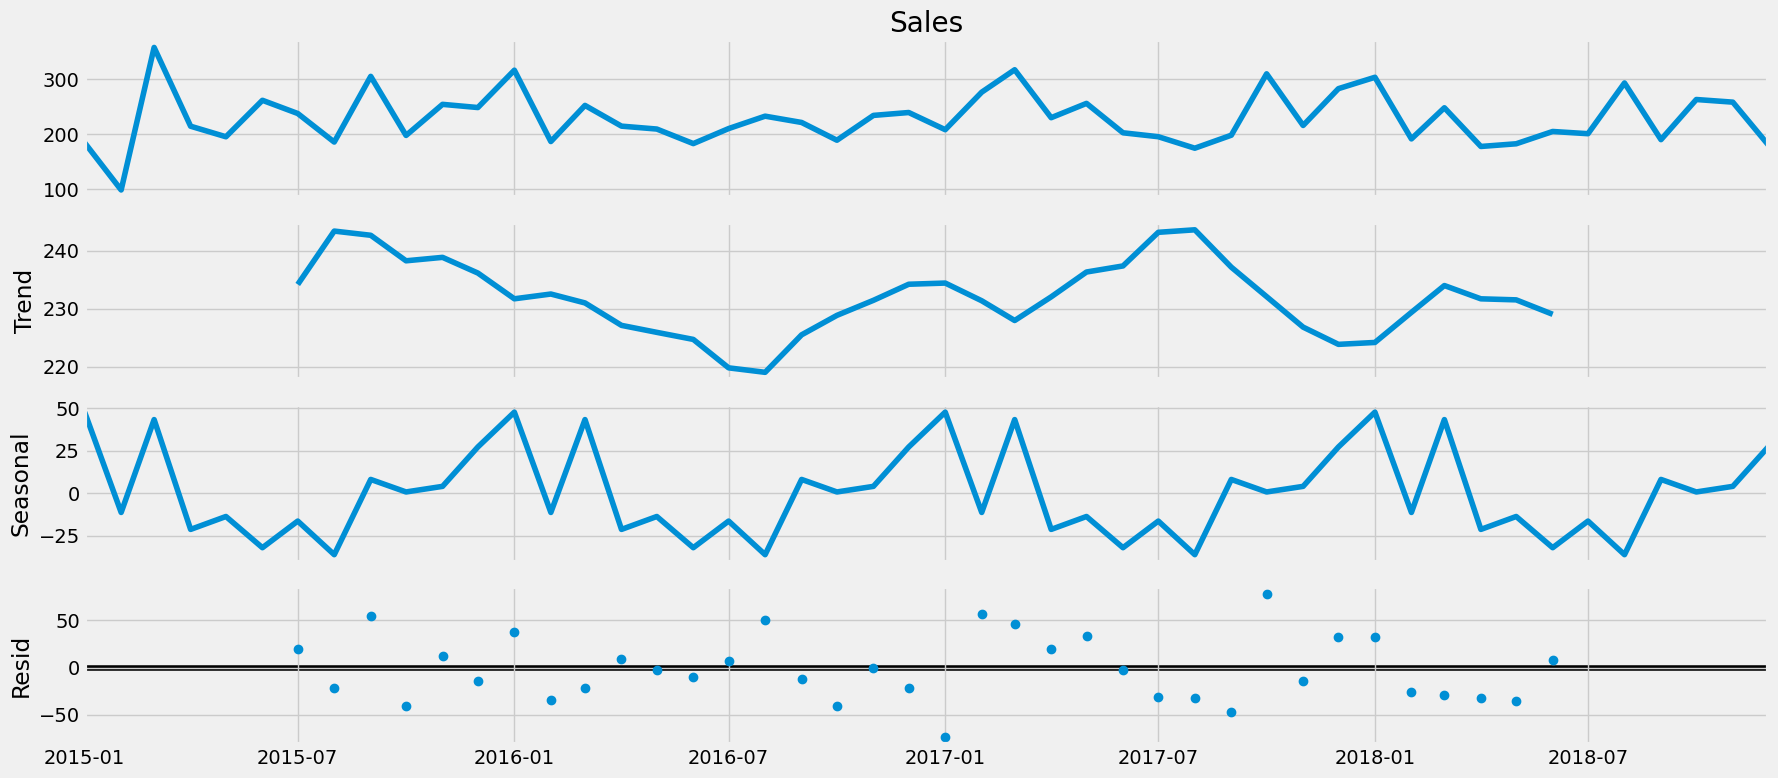

In [13]:
y = df['Sales'].resample('MS').mean()
#Now let's decover the seasonalities, trend, and residual behaviors of the data in the last 3 years

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8 #For visualization, to control Matplotlib figures

decomposition = sm.tsa.seasonal_decompose(y, model='additive') #Decomposing thr time series into seasonal trends
fig = decomposition.plot()
plt.show()

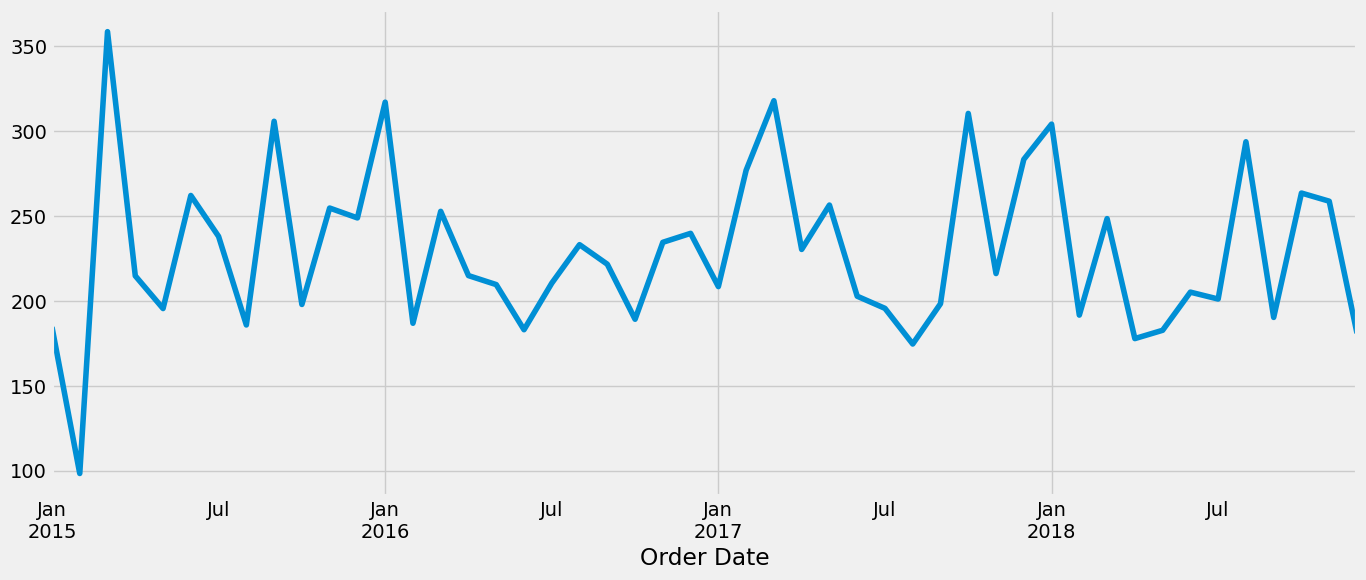

In [14]:
y.plot(figsize=(15, 6))
plt.show()

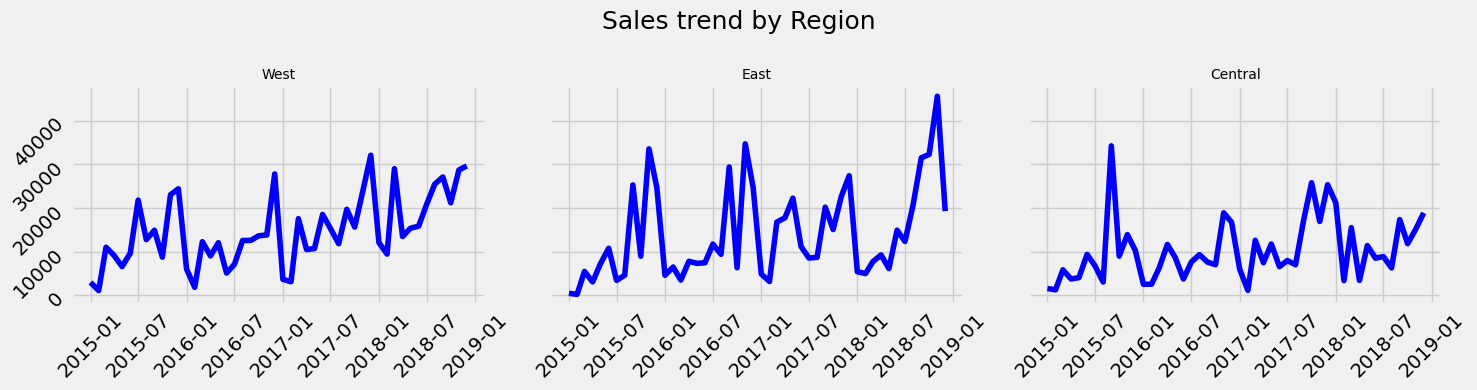

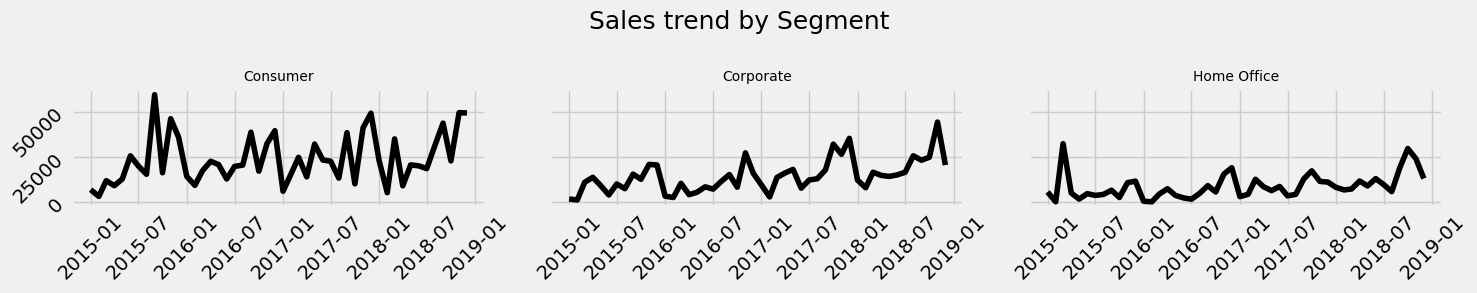

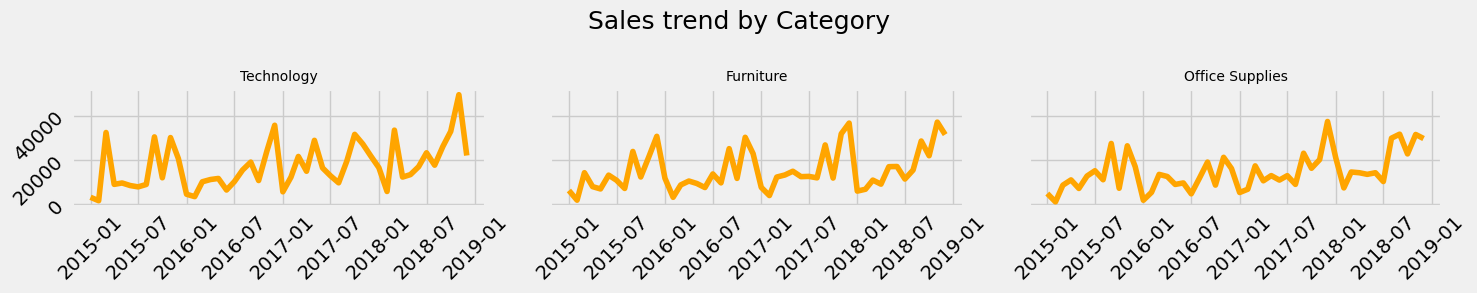

In [15]:
def plot_trend_attribute(att,size, color='blue'):
    sales_by_att =df.groupby(att)['Sales'].sum()
    sales_by_att.sort_values(ascending= False, inplace=True)
    sales_by_att.head(size)
    fig, axes = plt.subplots(int(size/3),3, figsize=(15,size), sharex =True, sharey =True)
    fig.suptitle('Sales trend by {}'.format(att), fontsize=18)
    for ax,group_name in zip(axes.flat, sales_by_att.index):
        sales_group = df[df[att]==group_name]
        sales_group = sales_group.groupby('Month')['Sales'].sum()
        sales_group.index = sales_group.index.to_timestamp()
        ax.tick_params(labelrotation=45)
        ax.set_title(group_name, fontsize = 10)
        ax.plot(sales_group, color=color)
    fig.tight_layout()
plot_trend_attribute('Region',4)
plot_trend_attribute('Segment',3,'Black')
plot_trend_attribute('Category',3, 'orange')


**Predictive Model: Prophet**

In [16]:
from prophet import Prophet as prf

In [17]:
# Drop other columns

df = df.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',	'City',	'State',	'Postal Code',	'Region',	'Product ID',	'Category',	'Sub-Category',	'Product Name'], axis=1)
df

,Sales,Month
Order Date,,
2017-11-08,261.9600,2017-11
2017-11-08,731.9400,2017-11
2017-06-12,14.6200,2017-06
2016-10-11,957.5775,2016-10
2016-10-11,22.3680,2016-10
...,...,...
2017-05-21,3.7980,2017-05
2016-01-12,10.3680,2016-01
2016-01-12,235.1880,2016-01


In [18]:
# Resampling the 'Sales' column of the DataFrame with a Month Start frequency('MS'). 
# It calculates the mean sales value for each month.
#'y' will be a time series where each value represents the sum sales for a specific month.
# To calculate and visualize the seasonalities after, we need the sum of each month

y_sales = df['Sales'].resample('MS').mean()
df = pd.DataFrame({'Order Date':y_sales.index, 'Sales':y_sales.values})

In [19]:
# Rename columns as 'ds' and 'y' as required by Prophet
# AND the order date should not be an index column to change its name to 'ds'
df.reset_index(inplace=True)
df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

df.head(1)

,index,ds,y
0,0,2015-01-01,184.489701


In [20]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

my_model = prf(interval_width = 0.95)

df

,index,ds,y
0,0,2015-01-01,184.489701
1,1,2015-02-01,98.258522
2,2,2015-03-01,358.479201
3,3,2015-04-01,214.668115
4,4,2015-05-01,195.407463
5,5,2015-06-01,262.007142
6,6,2015-07-01,237.898190
7,7,2015-08-01,185.736551
8,8,2015-09-01,305.706093
9,9,2015-10-01,197.820082


**We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.**

In [21]:
my_model = prf()
my_model.fit(df)

21:14:34 - cmdstanpy - INFO - Chain [1] start processing
21:14:35 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = my_model.make_future_dataframe(periods=24, freq='MS')
future.tail()

,ds
67,2020-08-01
68,2020-09-01
69,2020-10-01
70,2020-11-01
71,2020-12-01


In [23]:
future = my_model.predict(future)
future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,264.713638,218.184601,311.822821
1,2015-02-01,172.004940,125.615853,219.510357
2,2015-03-01,336.050060,287.738217,385.495547
3,2015-04-01,201.039280,153.735645,253.209909
4,2015-05-01,187.852072,143.672462,237.436105


(0.0, 500.0)

<Figure size 1800x600 with 0 Axes>

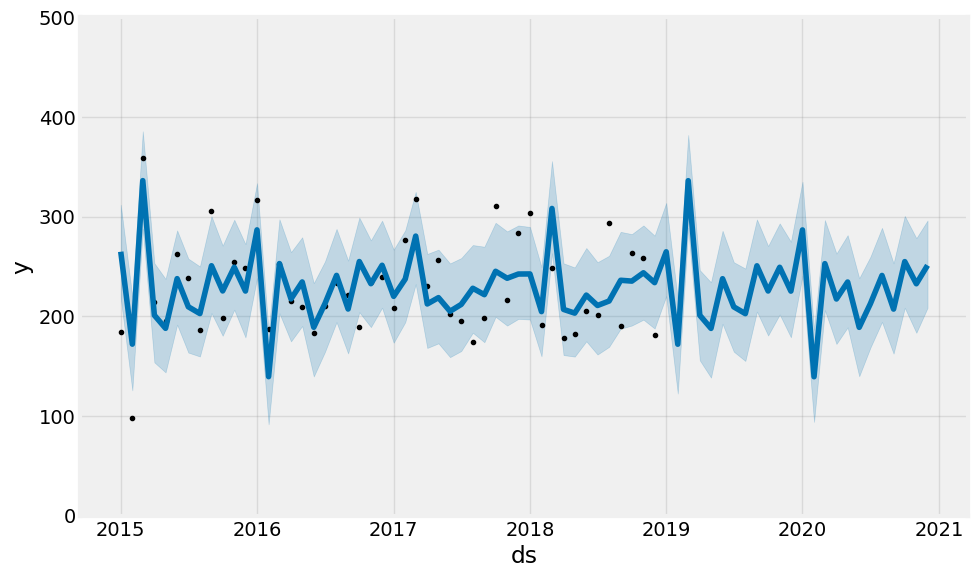

In [24]:
plt.figure(figsize = (18, 6))
fig1 = my_model.plot(future, uncertainty = True)
plt.ylim(0, 500)

In a Prophet plot, the line represents the forecasted values, while the dots represent the actual historical data points. The forecast line is what the model predicts based on the historical data, and the dots are the actual observed values. 

In [25]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(my_model, future)

plot_components_plotly(my_model, future)

In [28]:
# Calculating the forcast Error
df['error'] = (future['yhat'] - df['y'])
df['error squared'] = (future['yhat'] - df['y'])**2

# Mean Squared Error
mse = df['error squared'].mean()

print(mse)

1320.715689803123


In [27]:
# Mean Percentage Error

df['percentage_error'] = abs((future['yhat'] - df['y']) / df['y']) * 100

# To calculate the mean percentage error (MPE)
mpe = df['percentage_error'].mean()

print(mpe)
df

13.568037248501817


,index,ds,y,error,error squared,percentage_error
0,0,2015-01-01,184.489701,80.223936,6435.879948,43.484236
1,1,2015-02-01,98.258522,73.746418,5438.534180,75.053458
2,2,2015-03-01,358.479201,-22.429142,503.066389,6.256748
3,3,2015-04-01,214.668115,-13.628835,185.745143,6.348793
4,4,2015-05-01,195.407463,-7.555391,57.083937,3.866480
5,5,2015-06-01,262.007142,-24.299840,590.482209,9.274495
6,6,2015-07-01,237.898190,-28.435518,808.578670,11.952810
7,7,2015-08-01,185.736551,16.931822,286.686610,9.116042
8,8,2015-09-01,305.706093,-55.051768,3030.697171,18.008070
9,9,2015-10-01,197.820082,27.546356,758.801751,13.924955


**This emplies that our model has an 87% prediction accuracy which is pretty decent**